In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from app import ExponentialMixtureModel

In [2]:
# Helper functions
def Z(lambdas: np.ndarray | list, true_weights: np.ndarray, size: int = 100, random_state: int = 42):
    '''
    Computa una mixtura de funciones exponenciales con dos componentes.

    Args:
    - lambdas: np.ndarray, tasas de las distribuciones exponenciales.
    - true_weights: np.ndarray, pesos de las distribuciones exponenciales.
    - size: int, tamaño de la muestra.
    - random_state: int, semilla aleatoria.
    '''
    if isinstance(lambdas, list):
        lambdas = np.array(lambdas)
    elif isinstance(lambdas, np.ndarray):
        pass
    else:
        raise ValueError('Incorrect input value. lambdas should be a Numpy ndarray or list.')

    # Seed
    np.random.seed(random_state)

    # Genera distribuciones exponenciales
    X1 = np.random.exponential(scale=lambdas[0], size=size)
    X2 = np.random.exponential(scale=lambdas[1], size=size)

    # Genera la variable latente Z
    X = np.zeros(shape=100)
    target = np.zeros(shape=100)
    for i in np.arange(len(X1)):
        z = np.random.choice([0, 1], p=true_weights)
        if z == 0:
            X[i] = X1[i]
            target[i] = 0
        else:
            X[i] = X2[i]
            target[i] = 1
    
    return X, target

def sample(lambdas: tuple, size: int = 100, random_state: int = 42):
    '''
    Computa una mixtura de funciones exponenciales con dos componentes.

    Args:
    - lambdas: tuple, tasas de las distribuciones exponenciales.
    - size: int, tamaño de la muestra.
    - random_state: int, semilla aleatoria.
    '''

    # Seed
    np.random.seed(random_state)

    # Genera distribuciones exponenciales
    X1 = np.random.exponential(scale=lambdas[0], size=size)
    X2 = np.random.exponential(scale=lambdas[1], size=size)

    # Genera la variable X y target
    X = np.concatenate([X1, X2])
    target = np.concatenate([np.zeros(shape=size), np.ones(shape=size)])
    
    return X, target

## Primer muestra

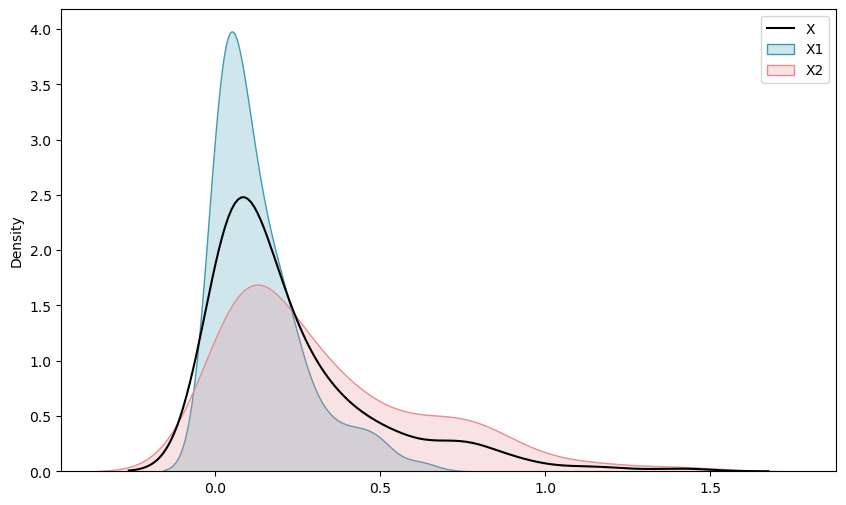

In [3]:
# Seed
np.random.seed(42)

# Genera dos muestras de 100 observaciones con exponenciales
X1 = np.random.exponential(scale=1/7, size=100)
X2 = np.random.exponential(scale=1/3, size=100)

# Genera la mixtura
X = np.concatenate([X1, X2])
target = np.concatenate([np.zeros(100), np.ones(100)])

# Visualización de los datos
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(X, color='black', ax=ax, label='X')
sns.kdeplot(X1, color='#3D9CB5', fill=True, ax=ax, label='X1')
sns.kdeplot(X2, color='#E98C90', fill=True, ax=ax, label='X2')
ax.legend()

In [4]:
# Ajustamos el modelo de mixtura de exponenciales
emm = ExponentialMixtureModel(k=2, max_iter=100)
emm.fit(X.reshape(-1, 1), verbose=False)
y_pred_emm = emm.predict(X.reshape(-1, 1))

# Ajustamos el modelo de mixtura de gaussianas
gmm = GaussianMixture(n_components=2, max_iter=100)
gmm.fit(X.reshape(-1, 1))
y_pred_gmm = gmm.predict(X.reshape(-1, 1))

# Accuracies
print(f'Accuracy EMM: {accuracy_score(target, y_pred_emm) * 100:.2f}%')
print(f'Accuracy GMM: {accuracy_score(target, y_pred_gmm) * 100:.2f}%')

Accuracy EMM: 59.50%
Accuracy GMM: 65.50%


## Segunda muestra

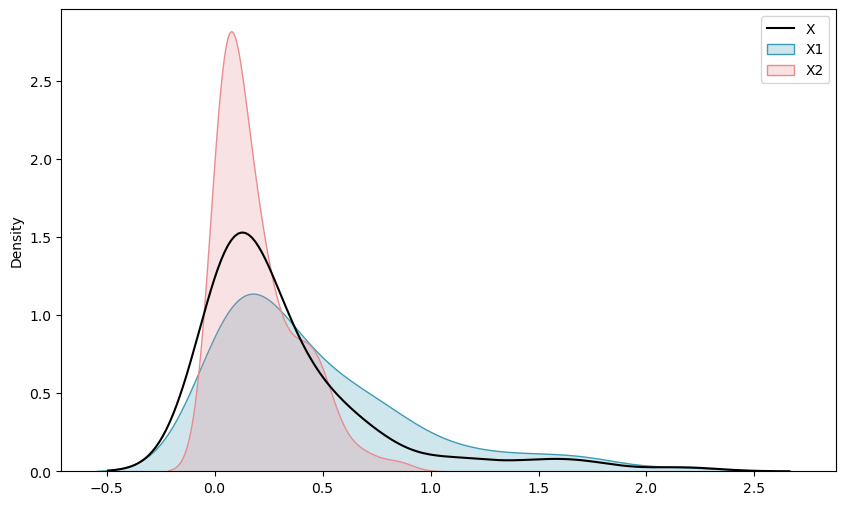

In [5]:
# Seed
np.random.seed(42)

# Genera dos muestras de 100 observaciones con exponenciales
X1 = np.random.exponential(scale=1/2, size=100)
X2 = np.random.exponential(scale=1/5, size=100)

# Genera la mixtura
X, target = Z(lambdas=[1/2, 1/5], true_weights=[0.5, 0.5], size=100, random_state=42)

# Visualización de los datos
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(X, color='black', ax=ax, label='X')
sns.kdeplot(X1, color='#3D9CB5', fill=True, ax=ax, label='X1')
sns.kdeplot(X2, color='#E98C90', fill=True, ax=ax, label='X2')
ax.legend()

In [6]:
# Ajustamos el modelo de mixtura de exponenciales
emm = ExponentialMixtureModel(k=2, max_iter=100)
emm.fit(X.reshape(-1, 1), verbose=False)
y_pred_emm = emm.predict(X.reshape(-1, 1))

# Ajustamos el modelo de mixtura de gaussianas
gmm = GaussianMixture(n_components=2, max_iter=100)
gmm.fit(X.reshape(-1, 1))
y_pred_gmm = gmm.predict(X.reshape(-1, 1))

# Accuracies
print(f'Accuracy EMM: {accuracy_score(target, y_pred_emm) * 100:.2f}%')
print(f'Accuracy GMM: {accuracy_score(target, y_pred_gmm) * 100:.2f}%')

Accuracy EMM: 31.00%
Accuracy GMM: 32.00%


## Tercera muestra

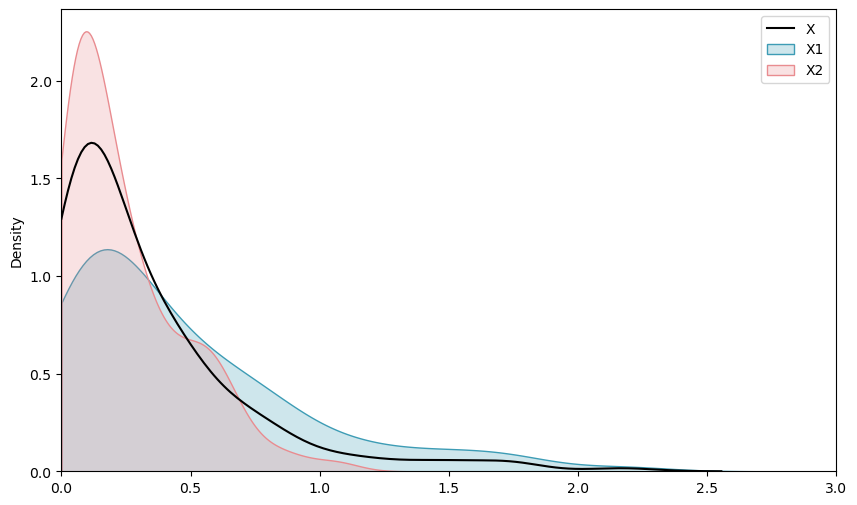

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed
np.random.seed(42)

# Genera dos muestras de 100 observaciones con exponenciales
X1 = np.random.exponential(scale=1/2, size=100)
X2 = np.random.exponential(scale=1/4, size=100)

# Genera la mixtura
X, target = sample(lambdas=[1/2, 1/5], size=100, random_state=42)

# Visualización de los datos con densidad
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(X, color='black', ax=ax, label='X', clip=(0, np.inf))
sns.kdeplot(X1, color='#3D9CB5', fill=True, ax=ax, label='X1', clip=(0, np.inf))
sns.kdeplot(X2, color='#E98C90', fill=True, ax=ax, label='X2', clip=(0, np.inf))
ax.set_xlim(0, 3)
ax.legend()
plt.show()

In [8]:
# Ajustamos el modelo de mixtura de exponenciales
emm = ExponentialMixtureModel(k=2, max_iter=100)
emm.fit(X.reshape(-1, 1), verbose=False)
y_pred_emm = emm.predict(X.reshape(-1, 1))

# Ajustamos el modelo de mixtura de gaussianas
gmm = GaussianMixture(n_components=2, max_iter=100)
gmm.fit(X.reshape(-1, 1))
y_pred_gmm = gmm.predict(X.reshape(-1, 1))

# Accuracies
print(f'Accuracy EMM: {accuracy_score(target, y_pred_emm) * 100:.2f}%')
print(f'Accuracy GMM: {accuracy_score(target, y_pred_gmm) * 100:.2f}%')

Accuracy EMM: 45.50%
Accuracy GMM: 36.50%


In [9]:
# Seed
np.random.seed(0)

# Cantidad de muestras que vamos a generar para cada combinación de tamaño y lambdas
num_simulations = 100

# Configuraciones de tamaño y lambdas
size_options = [50, 100, 200]
lambda_options = [(1/2, 1/3), (1/2, 1/6), (1/2, 1/10), (1, 1/3), (1, 1/6), (1, 1/10)]

results = []
# for size in size_options:
for lambdas in lambda_options:
    accuracies_emm = []
    accuracies_gmm = []
    
    for _ in range(num_simulations):
        # Generar datos exponenciales con tamaños y lambdas variables
        X = np.concatenate([
            np.random.exponential(scale=lambdas[0], size=100),
            np.random.exponential(scale=lambdas[1], size=100)
        ])
        true_labels = np.concatenate([np.zeros(100), np.ones(100)])
        
        # Modelo EMM
        emm = ExponentialMixtureModel(k=2, max_iter=500)
        emm.fit(X.reshape(-1, 1), verbose=False)
        predicted_labels_emm = emm.predict(X.reshape(-1, 1))
        accuracy_emm = accuracy_score(true_labels, predicted_labels_emm)
        accuracies_emm.append(accuracy_emm)
        
        # Modelo GMM
        gmm = GaussianMixture(n_components=2, max_iter=500, random_state=0)
        gmm.fit(X.reshape(-1, 1))
        predicted_labels_gmm = gmm.predict(X.reshape(-1, 1))
        accuracy_gmm = accuracy_score(true_labels, predicted_labels_gmm)
        accuracies_gmm.append(accuracy_gmm)
    
    # Guardar resultados promedio para esta configuración de tamaño y lambdas
    avg_accuracy_emm = np.mean(accuracies_emm)
    avg_accuracy_gmm = np.mean(accuracies_gmm)
    results.append({
        "size": 100,
        "lambdas": lambdas,
        "accuracy_emm": avg_accuracy_emm,
        "accuracy_gmm": avg_accuracy_gmm
    })

In [10]:
for result in results:
    print(f'Tamaño: {result['size']}, Lambdas: {result['lambdas']}')
    print(f'  Accuracy promedio EMM: {result['accuracy_emm'] * 100:.2f}%')
    print(f'  Accuracy promedio GMM: {result['accuracy_gmm'] * 100:.2f}%')

Tamaño: 100, Lambdas: (0.5, 0.3333333333333333)
  Accuracy promedio EMM: 48.94%
  Accuracy promedio GMM: 45.52%
Tamaño: 100, Lambdas: (0.5, 0.16666666666666666)
  Accuracy promedio EMM: 37.49%
  Accuracy promedio GMM: 35.54%
Tamaño: 100, Lambdas: (0.5, 0.1)
  Accuracy promedio EMM: 25.46%
  Accuracy promedio GMM: 27.79%
Tamaño: 100, Lambdas: (1, 0.3333333333333333)
  Accuracy promedio EMM: 36.24%
  Accuracy promedio GMM: 34.29%
Tamaño: 100, Lambdas: (1, 0.16666666666666666)
  Accuracy promedio EMM: 22.25%
  Accuracy promedio GMM: 23.21%
Tamaño: 100, Lambdas: (1, 0.1)
  Accuracy promedio EMM: 15.60%
  Accuracy promedio GMM: 16.47%


In [ ]:
# Seed
np.random.seed(0)

# Cantidad de muestras que vamos a generar para cada combinación de tamaño y lambdas
num_simulations = 100

# Configuraciones de tamaño y lambdas
# size_options = [50, 100, 200]
size_options = np.arange(50, 400, 50)

# lambda_options = [(1/2, 1/4), (1/2, 1/6), (1/2, 1/8)]

df = pd.DataFrame()
results = []
for size in size_options:
    accuracies_emm = []
    accuracies_gmm = []
    for _ in range(num_simulations):
        # Generar datos exponenciales con tamaños y lambdas variables
        X = np.concatenate([
            np.random.exponential(scale=1/2, size=size),
            np.random.exponential(scale=1/3, size=size)
        ])
        true_labels = np.concatenate([np.zeros(size), np.ones(size)])
        
        # Modelo EMM
        emm = ExponentialMixtureModel(k=2, max_iter=500)
        emm.fit(X.reshape(-1, 1), verbose=False)
        predicted_labels_emm = emm.predict(X.reshape(-1, 1))
        accuracy_emm = accuracy_score(true_labels, predicted_labels_emm)
        accuracies_emm.append(accuracy_emm)
        
        # Modelo GMM
        gmm = GaussianMixture(n_components=2, max_iter=500, random_state=0)
        gmm.fit(X.reshape(-1, 1))
        predicted_labels_gmm = gmm.predict(X.reshape(-1, 1))
        accuracy_gmm = accuracy_score(true_labels, predicted_labels_gmm)
        accuracies_gmm.append(accuracy_gmm)
    
    # Guardar resultados promedio para esta configuración de tamaño y lambdas
    avg_accuracy_emm = np.mean(accuracies_emm)
    avg_accuracy_gmm = np.mean(accuracies_gmm)

    results = {
        "size": size,
        "accuracy_emm": avg_accuracy_emm,
        "accuracy_gmm": avg_accuracy_gmm
    }

    df = pd.concat([df, pd.DataFrame([results])], axis=0, ignore_index=True)

    # results.append({
    #     "size": size,
    #     "lambdas": (1/2, 1/3),
    #     "accuracy_emm": avg_accuracy_emm,
    #     "accuracy_gmm": avg_accuracy_gmm
    # })

In [ ]:
for result in results:
    print(f'Tamaño: {result['size']}, Lambdas: {result['lambdas']}')
    print(f'  Accuracy promedio EMM: {result['accuracy_emm'] * 100:.2f}%')
    print(f'  Accuracy promedio GMM: {result['accuracy_gmm'] * 100:.2f}%')